In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

# Question 1 (20 pts)

(1) (10 pts) X ~ U(0, 1), Y ~ exp($\lambda$ = 1)

$$
pdf(X) = \left\{\begin{array}{ll}
{1} & { 0 \leq x \leq 1} \\
{0} & { -\infty < x < 0 \text{or} 1 < x < \infty }
\end{array}\right.
$$

$$
pdf(Y) = \left\{\begin{array}{ll}
{e^{-y}} & {0 \leq y < \infty} \\
{0} & {-\infty < y < 0}
\end{array}\right.
$$

To find the CDF of Z = X + Y, apply the convolution theorem. We get the following:

$$
\begin{aligned}
cdf(Z) 
&= \left\{\begin{array}{ll}
{0} & { z < 0} \\
{\int_0^z dx \int_0^{z-x} e^{-y} dy } & { 0 \leq z \leq 1} \\
{\int_0^1 dx \int_0^{z-x} e^{-y} dy } & { 1 < z < \infty} \\
\end{array}\right.  \\
&=\left\{\begin{array}{ll}
{0} & { z < 0} \\
{z - 1 + e^{-z}} & { 0 \leq z \leq 1} \\
{1 - e^{1-z} + e^{-z}} & { 1 < z < \infty} \\
\end{array}\right.  
\end{aligned}
$$

(4 pts) To get the pdf(Z), we must differentiate cdf(Z), so we get

$$
pdf(Z) = \left\{\begin{array}{ll}
{0} & { z < 0} \\
{1 - e^{-z}} & { 0 \leq z \leq 1} \\
{e^{1-z} - e^{-z}} & { 1 < z < \infty} \\
\end{array}\right.  
$$

(2 pts) To ensure that the density integrates to 1, we integrate pdf(Z) from -$\infty$ to $\infty$:

$$
\begin{aligned}
\int_{-\infty}^{\infty} pdf(Z) dz 
&= \int_{0}^{1} (1 - e^{-z}) dz + \int_{1}^{\infty} (e^{1-z} - e^{-z})dz \\
&= \frac{1}{e} + \frac{e-1}{e} \\
&= 1
\end{aligned}
$$

(2 pts) To find the median, recognize that:

$$
\int_0^1 (1 - e^{-z}) dz = \frac{1}{e} < .5, \text{so} \int_1^\alpha (e^{1-z} - e^{-z}) dz = .5 - \frac{1}{e}
$$

This results in $\alpha$ = 1.234

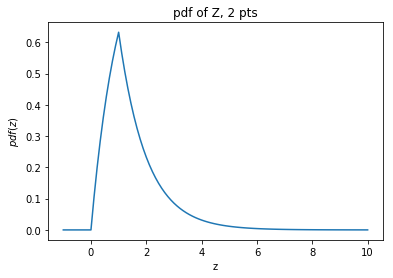

In [17]:
def pdf(z): 
    res = []
    
    for i in range(len(z)):
        if z[i] < 0:
            res.append(0)
        if z[i] >= 0 and z[i] <= 1:
            res.append(1 - math.exp(-z[i]))
        if z[i] > 1:
            res.append(math.exp(1-z[i]) - math.exp(-z[i]))

    return res
            
z = np.linspace(-1, 10, 100)
pdf_z = pdf(z)
plt.plot(z, pdf_z)
plt.title('pdf of Z, 2 pts')
plt.xlabel('z')
plt.ylabel('$pdf(z)$')
plt.show()

(2) (10 pts)

$$
\text{(3 pts)} E[X-Y] = E[X] - E[Y] = \frac{1}{2} - 1 = -\frac{1}{2} \\ 
E[(X-Y)^2] = E[X^2] - 2E[X]E[Y] + E[Y^2] = \frac{4}{3} \\
\text{(4 pts)} Var[X-Y] = E[(X-Y)^2] - (E[X-Y])^2 = \frac{4}{3} - \frac{1}{4} = \frac{13}{12} \\
\text{(3 pts)} E[ZX] = E[(X+Y)X] = E[X^2] + E[X]E[Y] = \frac{1}{3} + \frac{1}{2} = \frac{5}{6} \\
$$

# Question 2 (20 pts)

$$
f(x, y) = cxe^{-y}, 0 < x < y < \infty, c > 0
$$

(1) (4 pts)

$$
\int_0^{\infty} \int_x^{\infty} cxe^{-y} dy dx = 1 \\
\begin{aligned}
c \int_0^{\infty} x \int_x^{\infty} e^{-y} dy dx
&= c \int_0^{\infty} x (-e^{-y})_x^{\infty} dx \\
&= c * \Gamma(1) = 1
\end{aligned}
$$

So c = 1

(2) (4 pts, 2 pts for each f(x) and f(y))

$$
f(x) = \int_x^{\infty} x e^{-y} dy = x(-e^{-y})_x^{\infty} = xe^{-x}, x \in (0, \infty)
f(y) = \int_0^{y} x e^{-y} dx = \frac{1}{2} y^2e^{-y}, y \in (0, \infty)
$$

(3) (4 pts)

$$
f(x|y)  = \frac{f(x,y)}{f(y)} = \frac{2x}{y^2}, x \in (0, y)
$$

(4) (4 pts, 1 pt for each part)

$$
E[X] = \int_0^{\infty} x*xe^{-x} dx = \int_0^{\infty} x^2e^{-x}dx = 2 \\
E[Y] = \int_0^{\infty} y*\frac{1}{2} y^2e^{-y} dy = 3 \\
\begin{aligned}
E[XY]
&= \int_0^{\infty} \int_x^{\infty} x^2 y e^{-y} dy dx \\
&= \int_0^{\infty} x^2 \int_x^{\infty} y^2 e^{-y} dy dx \\
&= \int_0^{\infty} (xe^{-x} + e^{-x}) x^2 dx \\
&= \int_0^{\infty} x^3e^{-x} dx + \int_0^{\infty} x^2 e^{-x} dx \\
&= \Gamma(4) + \Gamma(3) = 3*2 + 2 = 8
\end{aligned} \\
Cov[XY] = E[XY] - E[X]E[Y] = 8 - 2*3 = 2
$$

(5) (4 pts)

$$
P(0 < X < \sqrt(Y)) = P(0 < X^2 < Y) \\
$$

If x $\leq$ 1, then:

$$
P(0 < X^2 < X) = 1 \\
P(X < Y) = 1
P(0 < X^2 < Y) = 1
P(0 < X < \sqrt(Y)) = 1
$$

If x > 1, then:

$$
\begin{aligned}
P(0 < X < \sqrt{Y}) 
&= P(0 < X^2 < Y) \\
&= \int_{x^2}^{\infty} xe^{-y} dy \\
&= xe^{-x^2} \\
\end{aligned}
$$

$$
\begin{aligned}
P(0 < X < \sqrt{Y}) 
&= \int_0^1 \int_x^{\infty} x e^{-y} dy dx + \int_0^1 \int_{x^2}^{\infty} x e^{-y} dy dx \\
&= \int_0^1 (-e^{-y})_x^{\infty} x dx + \int_1^{\infty} (-e^{-y})_x^{\infty} x dx \\
&= \int_0^1 xe^{-x} dx + \int_1^{\infty} xe^{-x^2} dx \\
&= (-xe^{-x} - e^{-x})_0^1 + \int_1^{\infty} xe^{-x^2} dx \\
&= \frac{-1}{e} + 1 - \frac{1}{e} + \frac{1}{2} \frac{1}{e} = 1 - \frac{3}{2e} = .448
\end{aligned}
$$

# Question 3 (20 pts)

(1) (5 pts)
The Beta distribution has a domain/support of (0, 1), just like the $\theta$ parameter in a Binomial Distribution. Also, the posterior of a Beta distribution is also a Beta distribution. Lastly, the $\alpha$ and $\beta$ parameters can take different values to offer insightful/robust modeling.

(2) (5 pts)
$$
p(y_B|\theta_B) = \frac{n_B!}{y_B!(n_B-y_B)!}\theta_B^{y_B}(1-\theta_B)^{(n_B-y_B)} \\
p(\theta_B) = \frac{\theta_B^{\alpha-1}(1-\theta_B)^{\beta-1}}{B(\alpha,\beta)}, \\
\text{where} B(\alpha, \beta) = \frac{\Gamma{(\alpha)}\Gamma{(\beta)}}{\Gamma{(\alpha + \beta)}}
$$



(3) (5 pts)

$$
p(\theta_B|y_B) \propto p(y_B|\theta_B)p(\theta_B) = \frac{n_B!}{B(\alpha,\beta)y_B!(n_B-y_B)!}\theta_B^{\alpha+y_B-1}(1-\theta_B)^{n_B-y_B+\beta-1} \\
\theta_B | y_B \text{~} B(y_B + \alpha, n_B - y_b + \beta)
$$

(4) (5 pts)
$$
\hat{\theta_{MLE, B}} = \frac{y_B}{n_B} = 0
$$

For such a point, the confidence interval is [0, 0]. Because this is for a point estimation, this is not a realistic/realizable case, so it is better to use a Bayesian approach. 

# Question 4 (20 pts)

$$
X | (Y = y) \text{~} N(\mu_{x|y}, \Sigma_{x|y}), \text{where} \\
\mu_{x|y} = \mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(y - \mu_y) = 2.15, \text{and} \\
\Sigma_{x|y} = \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\sigma_{yx} = .55
$$

So, for the conditional distribution,

$$
X \text{~} N(2.15, .55) = P(X | Y = -.5)
$$


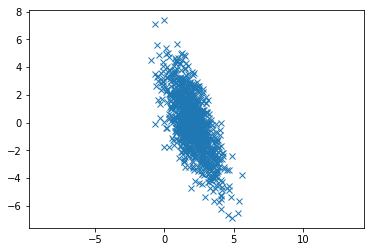

In [35]:
#Question 4 (20 pts): 

#P(x, y) (4 pts)

mean = [2, 0]
cov = [[1, -1.5], [-1.5, 5]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [70]:
def pdf(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma)*np.exp(-(x-mu)**2/(2*sigma))

In [4]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

In [5]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

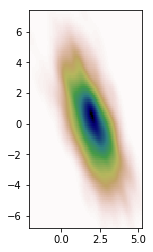

In [6]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [44]:
#P(x) (8 pts)

mean2 = [2]
cov2 = [[1]]
x2 = np.random.multivariate_normal(mean2, cov2, 1000).T
x2min = x2.min()
x2max = x2.max()

In [45]:
X2 = x2
positions2 = X2.flatten()
values2 = X2.flatten()
kernel2 = stats.gaussian_kde(values2)
Z2 = np.reshape(kernel2(positions2).T, X2.shape)

KeyboardInterrupt: 

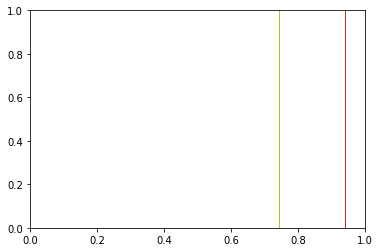

In [9]:
mu = 0
sigma = .3

count, bins, ignored = plt.hist(X2, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')

plt.show()

In [59]:

pdf_marginal_val = pdf(X2, mean[0], cov[0][0])

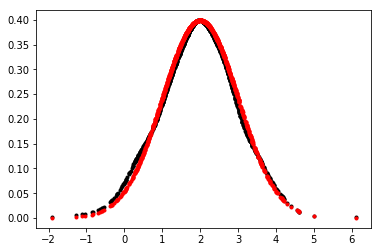

In [57]:
ax = plt.figure()
plt.plot(X2, Z2, 'k.') #gde values f(x)
plt.plot(X2, pdf_marginal_val, 'r.') #analytical f(x)
plt.show()

In [14]:
#P(x | y = -.5) (8 pts)

y_cond = -.5

mean3 = mean[0] + cov[0][1] * (y_cond - mean[1]) / cov[1][1]
cov3 = cov[0][0] - (cov[0][1] * cov[1][0]) / cov[1][1]
x3 = np.random.multivariate_normal([mean3], [[cov3]], 1000).T
x3min = x3.min()
x3max = x3.max()

In [15]:
X3 = x3
positions3 = X3.flatten()
values3 = X3.flatten()
kernel3 = stats.gaussian_kde(values3)
Z3 = np.reshape(kernel3(positions3).T, X3.shape)

In [62]:
pdf_conditional_val = pdf(X3, mean3, cov3)

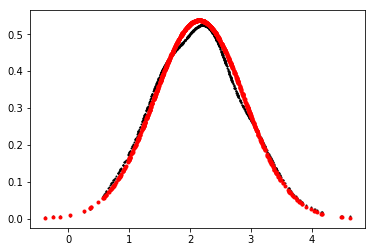

In [63]:
fig, ax = plt.subplots()
ax.plot(X3, Z3, 'k.', markersize=2) #gde values f(x | y = -.5)
ax.plot(X3, pdf_conditional_val, 'r.') #analytical f(x | y = -.5)
#ax.set_xlim([x2min, x2max])
plt.show()


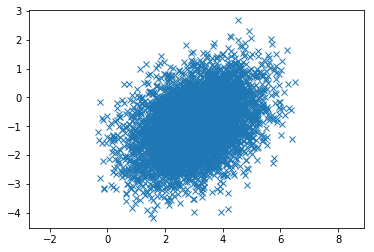

In [64]:
#Question 5 (20 pts)

#Plot Y and a gaussian kernel density (15 pts)

mean4 = [3, -1]
cov4 = [[1.2, .4], [.4, 1]]
x1, x2 = np.random.multivariate_normal(mean4, cov4, 5000).T
plt.plot(x1, x2, 'x')
plt.axis('equal')
plt.show()

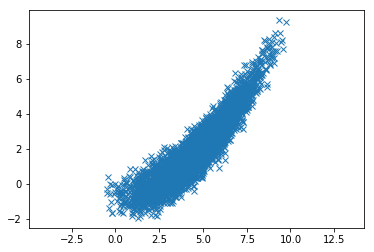

In [65]:
alpha = 1.5
beta = .2

y1 = alpha * x1
y2 = x2 * 1 / alpha + beta * (x1 * x1 + alpha * alpha)

plt.plot(y1, y2, 'x')
plt.axis('equal')
plt.show()

In [66]:
y1min = y1.min()
y1max = y1.max()
y2min = y2.min()
y2max = y2.max()

In [67]:
X, Y = np.mgrid[y1min:y1max:100j, y2min:y2max:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([y1, y2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

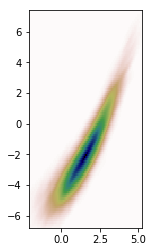

In [68]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [69]:
#Calculate empirical mean (5 pts)

print('The mean of y1 is', np.mean(y1))
print('The mean of y2 is', np.mean(y2))


The mean of y1 is 4.5249876353644085
The mean of y2 is 1.8697768139022035
